In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re

In [2]:
df_path= "../../scitweets.tsv"
df = pd.read_csv(df_path, sep='\t', header=0)

df = df.drop(columns=[col for col in df.columns if "Unnamed" in col] + ["tweet_id"])
df["text"] = df["text"].astype(str)

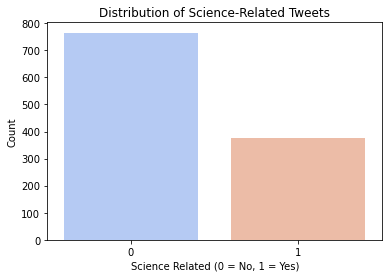

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(x="science_related", data=df, palette="coolwarm")
plt.title("Distribution of Science-Related Tweets")
plt.xlabel("Science Related (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

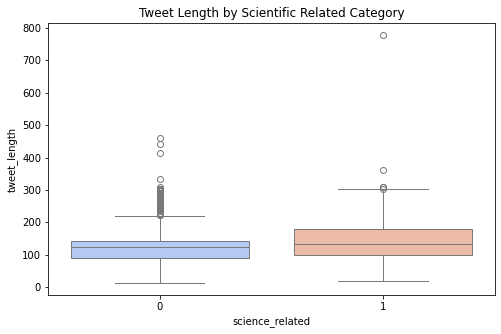

In [4]:
df["tweet_length"] = df["text"].apply(lambda x : len(x))

yes_tweets = df[df["science_related"] == 1]["tweet_length"]
no_tweets = df[df["science_related"] == 0]["tweet_length"]

plt.figure(figsize=(8, 5))
sns.boxplot(x="science_related", y="tweet_length", data=df, palette="coolwarm")
plt.title("Tweet Length by Scientific Related Category")
plt.show()

In [5]:
def count_links(text):
    """Counts the number of URLs in a text."""
    url_pattern = r'https?://\S+|www\.\S+'
    return len(re.findall(url_pattern, str(text)))

df["num_links"] = df["text"].apply(count_links)
df["num_links"].describe()

count    1140.000000
mean        0.789474
std         0.697086
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: num_links, dtype: float64

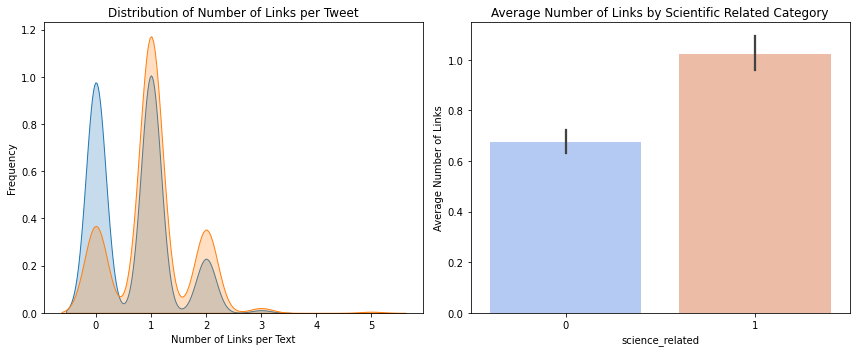

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#sns.histplot(data=df, x="num_links", bins=10, hue="science_related", multiple="stack", ax=axes[0])
sns.kdeplot(df[df["science_related"] == 0]["num_links"], label="Class 0", shade=True, ax=axes[0])
sns.kdeplot(df[df["science_related"] == 1]["num_links"], label="Class 1", shade=True, ax=axes[0])
axes[0].set_xlabel("Number of Links per Text")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Number of Links per Tweet")


sns.barplot(x="science_related", y="num_links", data=df, palette="coolwarm", ax=axes[1])
axes[1].set_title("Average Number of Links by Scientific Related Category")
axes[1].set_ylabel("Average Number of Links")

plt.tight_layout()
plt.show()


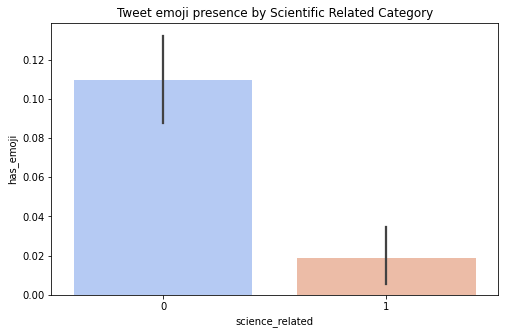

In [11]:
def has_emoji(text):
    """Detects if a text contains at least one emoji."""
    emoji_pattern = re.compile(
        "[\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alchemical Symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols, Symbols for legacy computing, etc.
        "\U0001FA70-\U0001FAFF"  # Symbols for legacy computing, other symbols
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  # Enclosed Characters
        "]+", flags=re.UNICODE)

    return bool(re.search(emoji_pattern, str(text)))

df["has_emoji"] = df["text"].apply(has_emoji)

plt.figure(figsize=(8, 5))
sns.barplot(x="science_related", y="has_emoji", data=df, palette="coolwarm")
plt.title("Tweet emoji presence by Scientific Related Category")
plt.show()

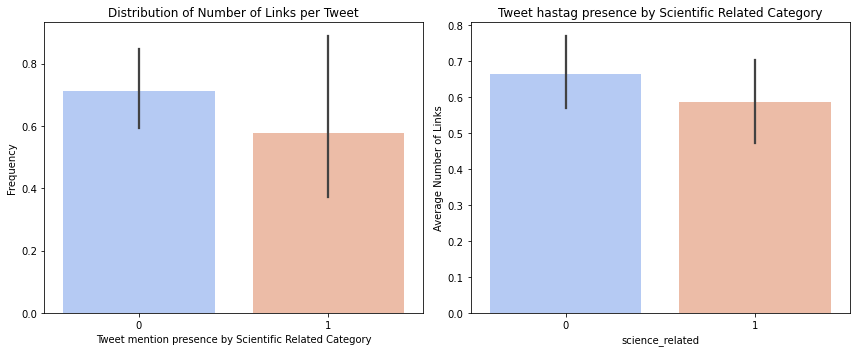

In [ ]:
def tags_number(text):
	"""Compute the number of tags by text ."""
	return len(re.findall(r'@[A-Za-z0-9_]+', text))
def hashtags_number(text):
	"""Compute the number of hashtags in the text."""
	return len(re.findall(r'#[A-Za-z0-9_]+', text))

df["tags_number"] = df["text"].apply(tags_number)
df["hashtags_number"] = df["text"].apply(hashtags_number)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x="science_related", y="tags_number", data=df, palette="coolwarm", ax=axes[0])
axes[0].set_xlabel("Tweet mention presence by Scientific Related Category")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Number of Links per Tweet")


sns.barplot(x="science_related", y="hashtags_number", data=df, palette="coolwarm", ax=axes[1])
axes[1].set_title("Tweet hastag presence by Scientific Related Category")
axes[1].set_ylabel("Average Number of Links")

plt.tight_layout()
plt.show()